In [1]:
# Na minha análise inicial, as colunas mais importantes são:
# id, name, host_id, host_name, neighbourhood, latitude, longitude, 
# property_type, room_type, price, has_availability review_scores_rating

import pandas as pd
df = pd.read_csv("listings_rio.csv")
df

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20250624193519,2025-06-28,city scrape,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Please note that elevated rates apply for New ...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,...,4.91,4.78,4.67,NaN,f,1,1,0,0,1.86
1,25026,https://www.airbnb.com/rooms/25026,20250624193519,2025-07-04,city scrape,Beautiful Modern Decorated Studio in Copacabana,"**Fully renovated in Dec 2022, new kitchen, n...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/7c08fa4f-1d7b...,102840,...,4.93,4.85,4.65,NaN,f,1,1,0,0,1.71
2,35764,https://www.airbnb.com/rooms/35764,20250624193519,2025-06-25,city scrape,COPACABANA SEA BREEZE - RIO - 25 X Superhost,Our newly renovated studio is located in the b...,Our guests will experience living with a local...,https://a0.muscache.com/pictures/23782972/1d3e...,153691,...,4.95,4.95,4.89,NaN,f,1,1,0,0,2.88
3,48305,https://www.airbnb.com/rooms/48305,20250624193519,2025-06-26,city scrape,Bright 6bed Penthouse Seconds from Beach,Enter Bossa Nova's history by staying in the v...,Enter Bossa Nova history by staying in the ver...,https://a0.muscache.com/pictures/miso/Hosting-...,70933,...,4.84,4.95,4.59,NaN,t,6,5,1,0,1.05
4,48901,https://www.airbnb.com/rooms/48901,20250624193519,2025-07-01,city scrape,Extra large 4BD 3BT on the AtlanticAve. Copaca...,LARGE Beach side 4 bedrooms 2 Complete bathro...,"Plenty of shops, entertainment andrestaurants<...",https://a0.muscache.com/pictures/hosting/Hosti...,222884,...,4.83,4.94,4.60,NaN,f,1,1,0,0,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42567,1450108622211032237,https://www.airbnb.com/rooms/1450108622211032237,20250624193519,2025-06-28,city scrape,Aconchego Constante,"Overlooking the sea, Aconchego Constante is an...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,703072927,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
42568,1450108828266063076,https://www.airbnb.com/rooms/1450108828266063076,20250624193519,2025-06-26,city scrape,Quarto casal,Premium and cozy location.,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,320682549,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
42569,1450124185987579534,https://www.airbnb.com/rooms/1450124185987579534,20250624193519,2025-06-30,city scrape,Cama em Dorm Misto (9) com AC,"Single bed in a mixed room with nine beds, loc...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,37776540,...,NaN,NaN,NaN,NaN,t,8,0,4,4,NaN
42570,1450124362124784419,https://www.airbnb.com/rooms/1450124362124784419,20250624193519,2025-06-26,city scrape,Quarto para casal,Great location and cozy room to enjoy your trip.,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,378959794,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN


# Outliers e estatísticas básicas

### Explique em Markdown o conceito de outlier e discuta como ele pode afetar a interpretação da média e da mediana no dataset\.

Outliers são valores distantes da tendência central dos dados. Por exemplo, analizando valores de medição de temperatura em determinado equipamento, ou analizando a média de salário de uma determinada empresa. Nesses dois exemplos, outliers (um pico súbito na medição de temperatura ou o salário do diretor da empresa) podem erroneamente alterar a média dos valores. Neste primeiro caso, é mais vantajoso analisar a mediana para obter um valor que represente com mais precisão a tendência central. Porém, caso a totalidade dos valores seja necessária para obter o valor mais preciso, como a média de vendas da empresa, com um vendedor que vende acima da tendência central, é mais vantajoso utilizar a média.

### Calcule média, mediana e moda para a variável price\. Compare os resultados em Markdown, destacando indícios de assimetria\.

In [2]:
df.price = df.price.str.replace("$","").str.replace(",","").astype(float)

In [3]:
# Analisando os valores, podemos observar que a moda e a mediana estão próximas, 
# o que faz sentido para um valor de preço, que logicamente teria uma distribuição normal.
# Assim o valor que mais aparece esta bem proximo da tendência.
# Mas a média está bem distante da mediana, indicando a presença de outliers, que neste caso,
# são maiores que a mediana. Podemos então constatar, que existem lugares com o valor muito
# mais alto que a maioria na cidade do rio de janeiro.

print(f"Média é: {df.price.mean()}")
print(f"Mediana é: {df.price.median()}")
print(f"Moda é: {df.price.mode()}")

Média é: 688.0094634796882
Mediana é: 311.0
Moda é: 0    300.0
Name: price, dtype: float64


### Identifique possíveis outliers no preço utilizando o método do IQR \(Interquartile Range\) e reporte a quantidade encontrada\.

In [4]:
Q1, Q3 = df.price.quantile([0.25, 0.75])
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df.price < limite_inferior) | (df.price > limite_superior)]
quantidade_outliers = len(outliers)

print(f"Quantidade de outliers: {quantidade_outliers}")

Quantidade de outliers: 3831


# Dispersão e variabilidade

### Calcule o desvio padrão do preço e interprete seu significado em relação à média\.

In [5]:
# o desvio padrão é muito alto, existe uma variação muito grande nos preços de algumas locações

desvio_padrao = df.price.std()
media = df.price.mean()

coeficiente_variacao = (desvio_padrao / media) * 100
print(f"Desvio Padrão: {desvio_padrao:.2f}")
print(f"Coeficiente de Variação: {coeficiente_variacao:.2f}%")

Desvio Padrão: 3758.45
Coeficiente de Variação: 546.28%


### Calcule e apresente a variância da variável minimum\_nights\. Discuta em Markdown se a dispersão é alta ou baixa\.

In [6]:
# A variância é muito alta. uma variância de 218 para uma média de 3.6
# É possível ver mais claramente pelo coeficiente de variação de 400%

media_noites = df.minimum_nights.mean()
variancia_noites = df.minimum_nights.var()
desvio_noites = df.minimum_nights.std()
coeficiente_variacao_noites = (desvio_noites / media_noites) * 100

print(f"Desvio Padrão: {desvio_noites:.2f}")
print(f"Coeficiente de Variação: {coeficiente_variacao_noites:.2f}%")

print(f"Média: {media_noites}")
print(f"Variância: {variancia_noites}")

Desvio Padrão: 14.80
Coeficiente de Variação: 406.59%
Média: 3.638964577656676
Variância: 218.9126138817172


### Crie um resumo tabular com média, mediana, desvio padrão e variância das variáveis numéricas selecionadas \(price, minimum\_nights, number\_of\_reviews\)\.

In [7]:
def cria_estatisticas(coluna):
   media = coluna.mean()
   mediana = coluna.median()
   desvio = coluna.std()
   variancia = coluna.var()
   coeficiente_variacao = (desvio / media) * 100
   print(f"Média: {media}")
   print(f"Mediana: {mediana}")
   print(f"Desvio Padrão: {desvio}")
   print(f"Variância: {variancia}")
   print(f"Coeficiente Variação {coeficiente_variacao}")

print("---Estatísticas Preço---")
cria_estatisticas(df.price)

print("---Estatísticas Noites Mínimas---")
cria_estatisticas(df.minimum_nights)

print("---Estatísticas Reviews---")
cria_estatisticas(df.number_of_reviews)

---Estatísticas Preço---
Média: 688.0094634796882
Mediana: 311.0
Desvio Padrão: 3758.4547631780315
Variância: 14125982.206855632
Coeficiente Variação 546.2795154254432
---Estatísticas Noites Mínimas---
Média: 3.638964577656676
Mediana: 2.0
Desvio Padrão: 14.795695789036662
Variância: 218.9126138817172
Coeficiente Variação 406.59081651639497
---Estatísticas Reviews---
Média: 25.11690782674058
Mediana: 7.0
Desvio Padrão: 47.330773672368224
Variância: 2240.202136424945
Coeficiente Variação 188.44188145635417


# Visualizações de distribuições

### Construa um histograma para a variável price com pelo menos 30 bins\. Interprete o formato da distribuição\.

<AxesSubplot: xlabel='price', ylabel='Count'>

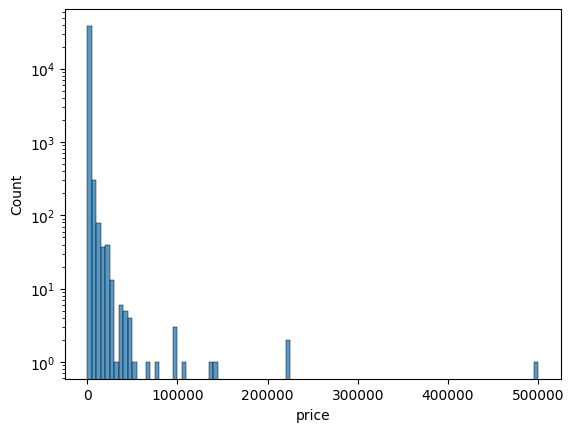

In [8]:
import seaborn as sb

sb.histplot(data=df.price, log=True, bins=100)

# Parece ser uma distribuição exponencial negativa, com alguns picos 100.000 e 500.00

### Crie um boxplot para a variável minimum\_nights e explique como identificar outliers a partir da visualização\.

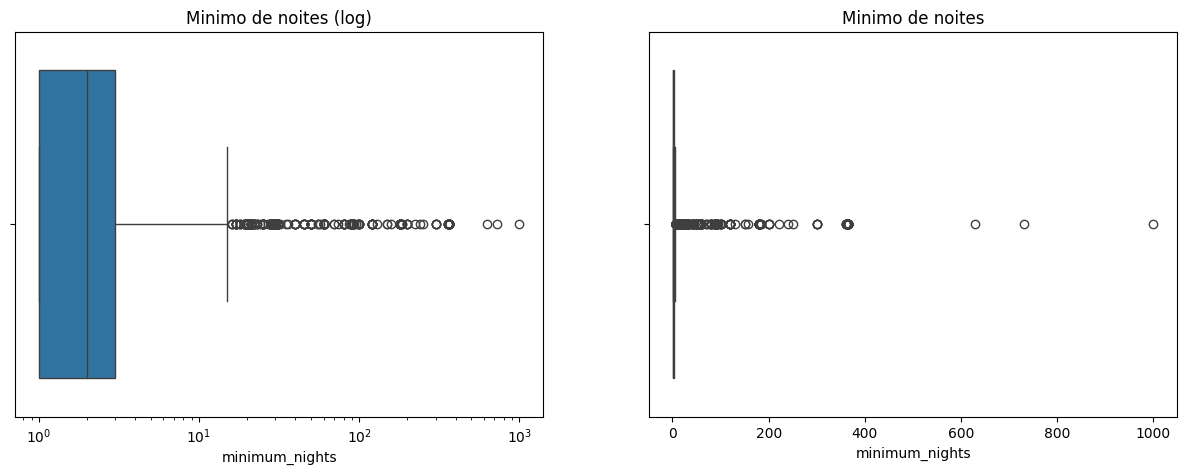

In [9]:
# Utilizei escala logaritmica na figura da esquerda para permitir a visualização 
# da parte central do gráfico
# Todos os circulos, após o limite superior (a ultima linha), são os outliers
import matplotlib.pyplot as plt
import seaborn as sb

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sb.boxplot(x=df['minimum_nights'], ax=axes[0], log_scale=True)
axes[0].set_title('Minimo de noites (log)')

sb.boxplot(x=df['minimum_nights'], ax=axes[1])
axes[1].set_title('Minimo de noites')

plt.show()

### Gere um gráfico de densidade \(KDE plot\) para a variável reviews\_per\_month e discuta o comportamento da cauda da distribuição\.

<AxesSubplot: xlabel='reviews_per_month', ylabel='Density'>

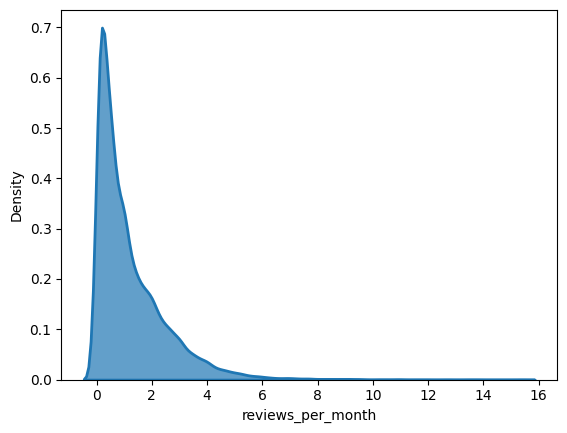

In [10]:
# Podemos observar o pico, densidade, 0.7, próximo ou em 0 reviews, e diminuindo exponencialmente
# até chegar a menos de 0.1 em 6 reviews por mês.
# Algo que na minha análise é um comportamento esperado para essa variável que indica também
# a popularidade das locações, tendo uma maior concentração de reviews em poucas locações.

sb.kdeplot(data=df['reviews_per_month'], fill=True, alpha=0.7, linewidth=2)

#  Análise de variáveis categóricas

### Calcule a proporção de anúncios por room\_type e apresente o resultado em gráfico de barras\.

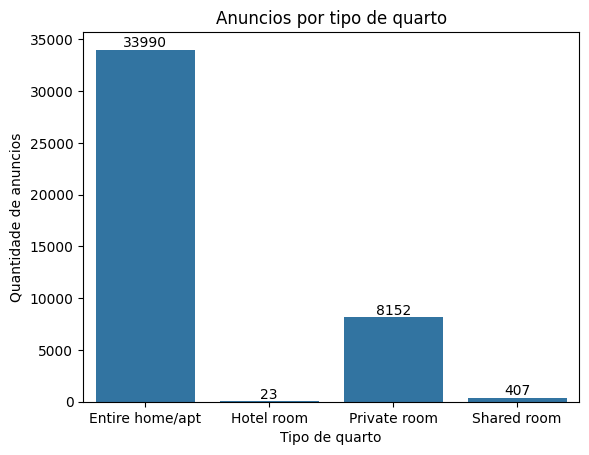

In [11]:
anuncios_por_tipo = df.groupby('room_type')['id'].count()
ax = sb.barplot(anuncios_por_tipo)
plt.title('Anuncios por tipo de quarto')
plt.xlabel('Tipo de quarto')
plt.ylabel('Quantidade de anuncios')
for container in ax.containers:
    ax.bar_label(container)

### Calcule a distribuição percentual de anúncios por neighbourhood\_group e represente graficamente\. 

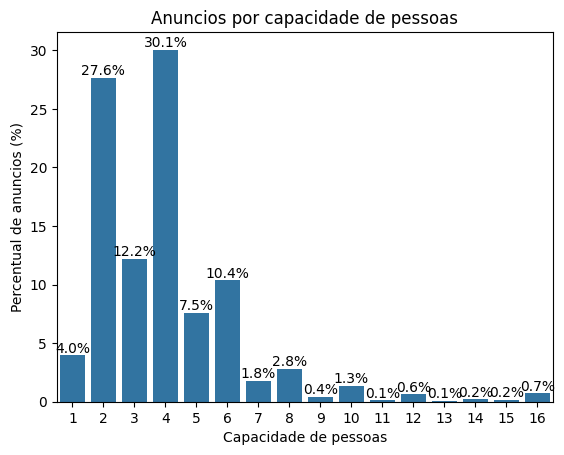

In [12]:
anuncios_por_bairro = df.groupby('accommodates')['id'].count()
total_anuncios = anuncios_por_bairro.sum()
anuncios_por_bairro_percentual = (anuncios_por_bairro / total_anuncios * 100).round(2)

ax = sb.barplot(anuncios_por_bairro_percentual)
plt.title('Anuncios por capacidade de pessoas')
plt.xlabel('Capacidade de pessoas')
plt.ylabel('Percentual de anuncios (%)')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

### Discuta em Markdown como a variável license pode ser utilizada como indicador regulatório e quais limitações existem na sua análise exploratória\.

In [13]:
# a coluna license está vazia. Não encontrei nenhuma outra coluna que pudesse substitui-la nessa questão
df.license

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42567   NaN
42568   NaN
42569   NaN
42570   NaN
42571   NaN
Name: license, Length: 42572, dtype: float64

#  Valor esperado e insights

### Calcule o valor esperado do preço \(price\) para cada categoria de room\_type\. 

In [14]:
# Para a coluna price, o valor esperado será a média
df.groupby('room_type')['price'].mean()

room_type
Entire home/apt    762.347001
Hotel room         610.230769
Private room       391.666621
Shared room        194.112903
Name: price, dtype: float64

### Calcule o valor esperado do número de avaliações \(number\_of\_reviews\) para cada neighbourhood\_group\.

In [15]:
df.groupby('accommodates')['number_of_reviews'].mean()

accommodates
1     15.579073
2     24.994561
3     28.375649
4     26.147526
5     26.484132
6     24.667498
7     24.341591
8     23.802013
9     34.289773
10    13.014060
11    38.916667
12    11.965779
13    26.787879
14    23.928571
15    16.440000
16    11.532895
Name: number_of_reviews, dtype: float64

### Discuta em Markdown quais variáveis parecem ter maior impacto nos padrões de hospedagem da cidade analisada e como isso pode auxiliar na tomada de decisão\.

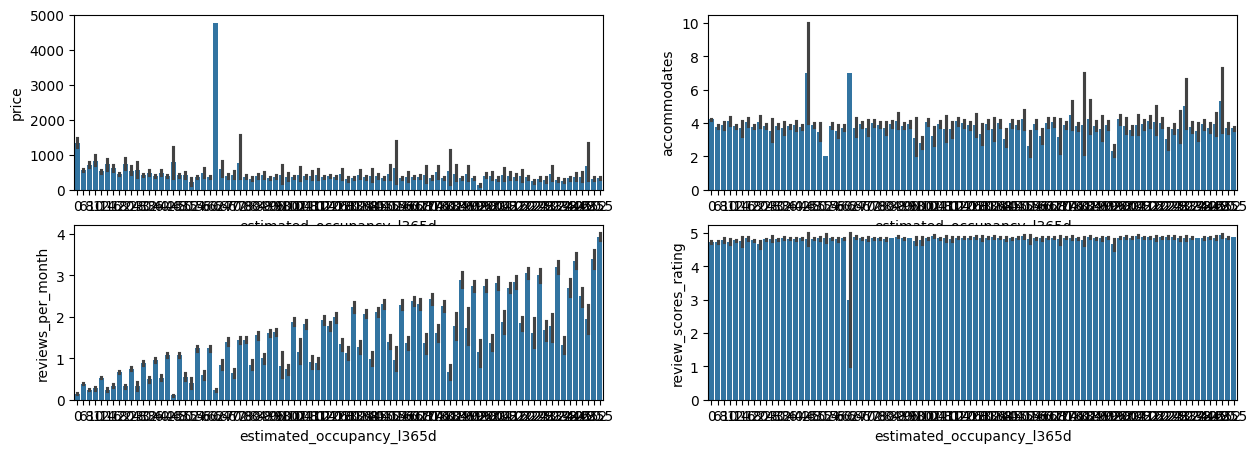

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(15, 5))
sb.barplot(data=df, x='estimated_occupancy_l365d', y='price', ax=axes[0, 0])
sb.barplot(data=df, x='estimated_occupancy_l365d', y='reviews_per_month', ax=axes[1, 0])
sb.barplot(data=df, x='estimated_occupancy_l365d', y='accommodates', ax=axes[0, 1])
sb.barplot(data=df, x='estimated_occupancy_l365d', y='review_scores_rating', ax=axes[1, 1])
plt.show()

Das variáveis analisadas, a que parece ter maior correlação com a estimativa de ocupação dos quartos por ano, é o número de reviews por mes. Nem preco, nem a quantidade de acomodações, nem a nota da acomoação, parece influênciar muito claramente o aluguel das acomodações.